In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import random as rand

In [8]:
def plot(X):
    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, alpha = 0.5, label = "Stabe distribution")
    plt.legend()
    plt.show()

# a-stable distribution

In [2]:
n = 1000
mean = 1

O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [3]:
def stable(O, W, alpha, beta):
    if alpha == 1:
        Z = 2 / np.pi * ((np.pi / 2 + beta * O) * np.tan(O) - beta * np.log(np.pi / 2 * W * np.cos(O) / (np.pi / 2 + beta * O)))
    else:
        O_0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
        Z = np.sin(alpha * (O_0 + O)) / (np.cos(alpha * O_0) * np.cos(O))**(1/alpha) * ((np.cos(alpha * O_0 + (alpha - 1) * O)) / W)**((1-alpha)/alpha)
    return Z

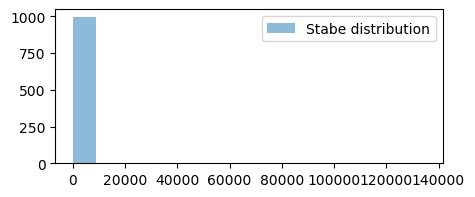

In [11]:
alpha = 0.9
beta = 1

Z = stable(O, W, alpha, beta)
plot(Z)

# a-stable vector

In [47]:
def stable_vector(Zs, gammas, ss, d):
    Xs = []
    n = len(gammas)
    for i in range(d):
        X = []
        if alpha == 1:
            for j in range(n):
                X.append(gammas[j] * (Zs[j] + 2/np.pi * np.log(gammas[j])) * ss[j][i])
            Xs.append(sum(X))
        else:
            for j in range(n):
                X.append(np.power(gammas[j], 1/alpha) * Zs[j] * ss[j][i])
            Xs.append(sum(X))
    return Xs

In [60]:
gammas = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
ss = [[1, 0], 
      [1/2, np.sqrt(3)/2], 
      [-1/2, np.sqrt(3)/2],
      [-1, 0],
      [-1/2, -np.sqrt(3)/2],
      [1/2, -np.sqrt(3)/2]]
d = 2
alpha = 0.9

In [61]:
Zs = []
n = 10000
mean = 1

for i in range(len(gammas)):
    O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
    U = uniform.rvs(size = n)
    W = - mean * np.log(1 - U)
    
    Zs.append(stable(O, W, alpha, 1))

In [63]:
Xs = stable_vector(Zs, gammas, ss, d)

In [64]:
Xs

[array([ -6.72982587,  -0.71481739,  -0.13386747, ...,   0.22978775,
         33.41186707, -15.59740594]),
 array([13.79797416,  0.2157616 , -0.29488532, ...,  0.44646891,
         0.98389   , 26.22379421])]

In [65]:
for i in range(len(Xs)):
    print(Xs[i].min())
    print(Xs[i].max())

-4960.759554926044
1655.092985820858
-1915.4575777379514
8592.36259952679


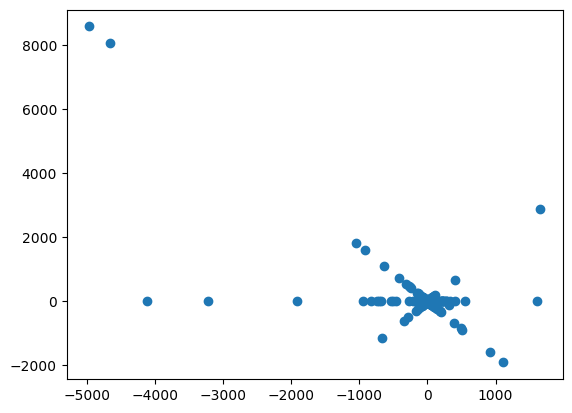

In [66]:
plt.scatter(Xs[0], Xs[1])

In [67]:
gammas = [0.1, 0.3, 0.1, 0.3, 0.1]
ss = [[1, 0], 
      [np.sqrt(3)/2, 1/2], 
      [1/2, np.sqrt(3)/2],
      [0, 1],
      [-1/2, np.sqrt(3)/2]]
d = 2
alpha = 1.6

In [68]:
Zs = []
n = 1000
mean = 1

for i in range(len(gammas)):
    O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
    U = uniform.rvs(size = n)
    W = - mean * np.log(1 - U)
    
    Zs.append(stable(O, W, alpha, 1))

In [69]:
Xs = stable_vector(Zs, gammas, ss, d)

In [ ]:
Xs

In [71]:
for i in range(len(Xs)):
    print(Xs[i].min())
    print(Xs[i].max())

-8.175418203641112
25.880442057431704
-2.466285336177158
95.74697858733651


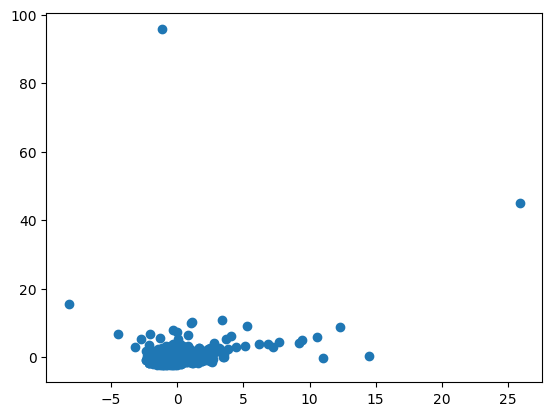

In [72]:
plt.scatter(Xs[0], Xs[1])